# Twitter sentiment analysis - Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
val = pd.read_csv('twitter_validation.csv')
train = pd.read_csv('twitter_training.csv')

In [16]:
train.columns=['id','information','type','text']
train.head()

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
val.columns=['id','information','type','text']
val.head()

,id,information,type,text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [46]:
train_data = train
test_data = val

In [18]:
train_data

,id,information,type,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [48]:
test_data

,id,information,type,text,lower
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
3,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,hi eahelp i ve had madeleine mccann in my cel...
...,...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...,toronto is the arts and culture capital of c...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...,this is actually a good move tot bring more vi...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...,today sucked so it s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.,bought a fraction of microsoft today small wins


In [49]:
def transform_text(data):
    data['lower'] = data['text'].str.lower()  # Convert text to lowercase
    data['lower'] = data['lower'].astype(str)  # Convert all to string
    data['lower'] = data['lower'].apply(lambda x: re.sub('[^A-Za-z0-9 ]+', ' ', x))  # Remove non-alphanumeric characters
    return data

# Applying transformations to train_data and val_data
train_data = transform_text(train_data)
val_data = transform_text(test_data)

In [22]:
train_data.head(10)

,id,information,type,text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...,so i spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...,so i spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...,so i spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...,2010 so i spent a few hours making something f...


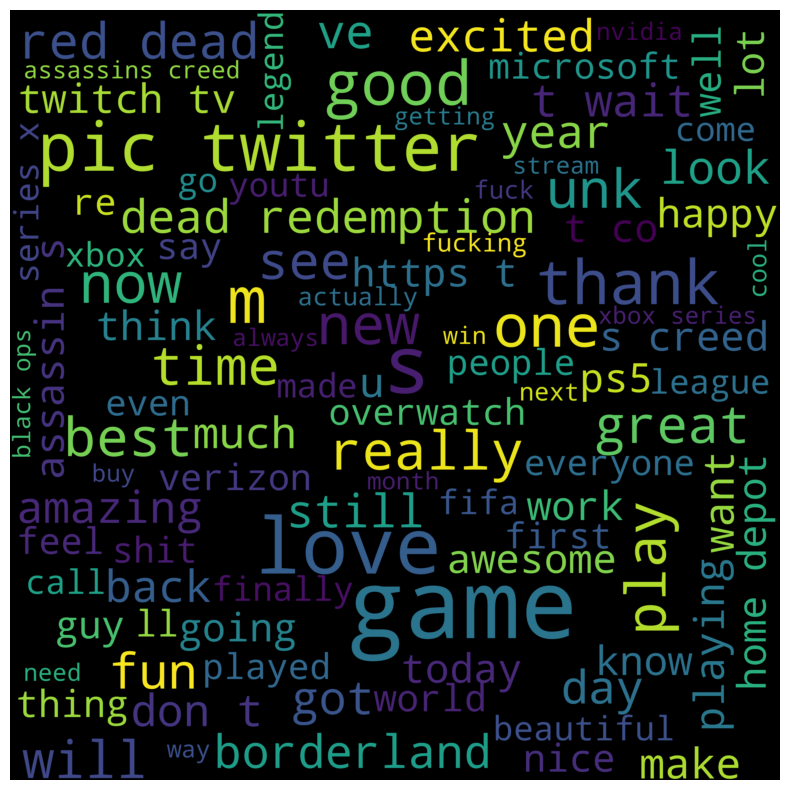

In [23]:
# Filter data and create text for word cloud
positive_data = train_data[train_data["type"] == "Positive"]
word_cloud_text = ' '.join(positive_data['lower'])

# Creation of word cloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

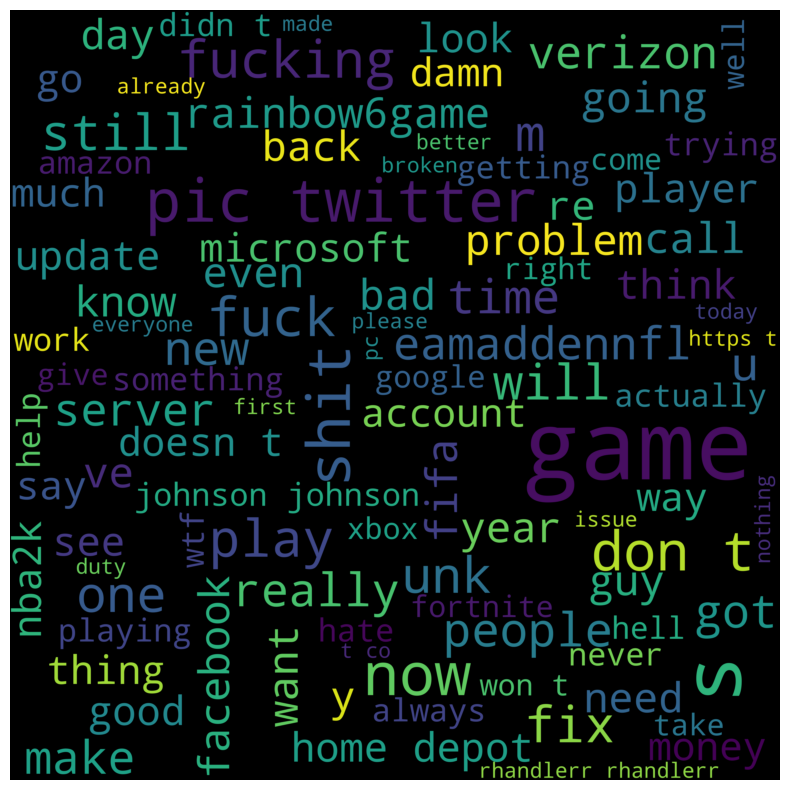

In [25]:
# Filter data and create text for word cloud
negative_data = train_data[train_data["type"] == "Negative"]
word_cloud_text = ' '.join(negative_data['lower'])

# Creation of word cloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

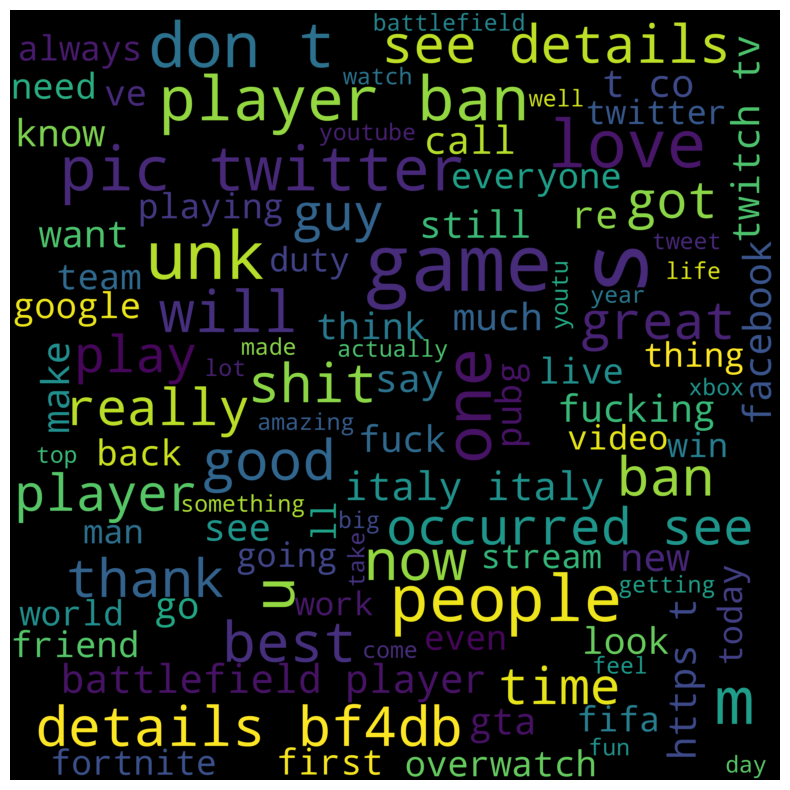

In [26]:
# Filter data and create text for word cloud
irrelevant_data = train_data[train_data["type"] == "Irrelevant"]
word_cloud_text = ' '.join(irrelevant_data['lower'])

# Creation of word cloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

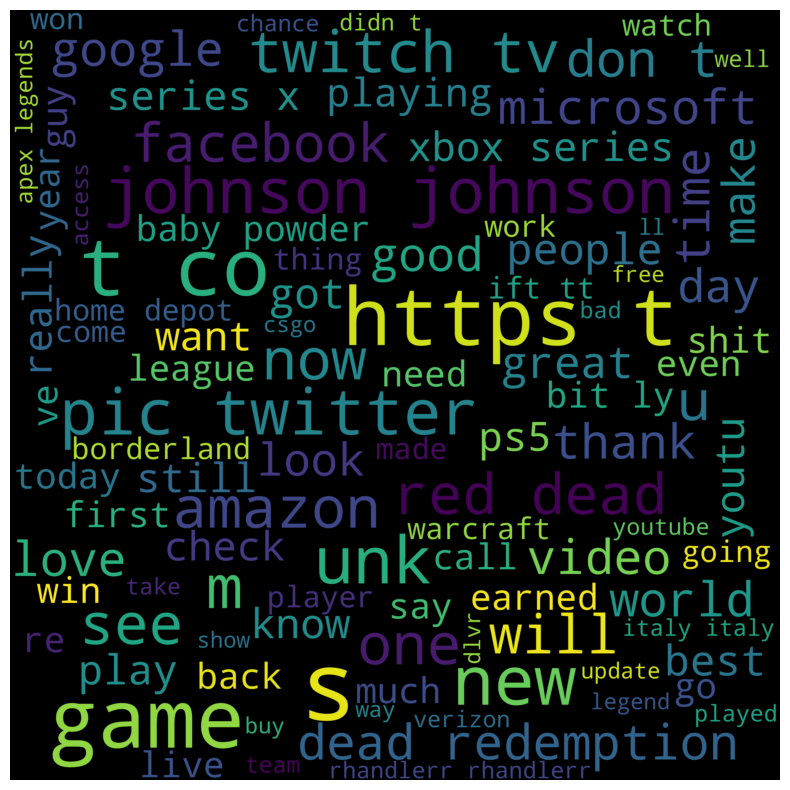

In [27]:
# Filter data and create text for word cloud
neutral_data = train_data[train_data["type"] == "Neutral"]
word_cloud_text = ' '.join(neutral_data['lower'])

# Creation of word cloud
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="black",
    scale=10,
    width=800,
    height=800
).generate(word_cloud_text)

# Figure properties
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [29]:
count = train.groupby(['information', 'type']).count().reset_index()
count

,information,type,id,text,lower
0,Amazon,Irrelevant,192,186,192
1,Amazon,Negative,576,575,576
2,Amazon,Neutral,1236,1207,1236
3,Amazon,Positive,312,308,312
4,ApexLegends,Irrelevant,192,192,192
...,...,...,...,...,...
123,Xbox(Xseries),Positive,792,785,792
124,johnson&johnson,Irrelevant,198,197,198
125,johnson&johnson,Negative,846,845,846
126,johnson&johnson,Neutral,1014,1013,1014


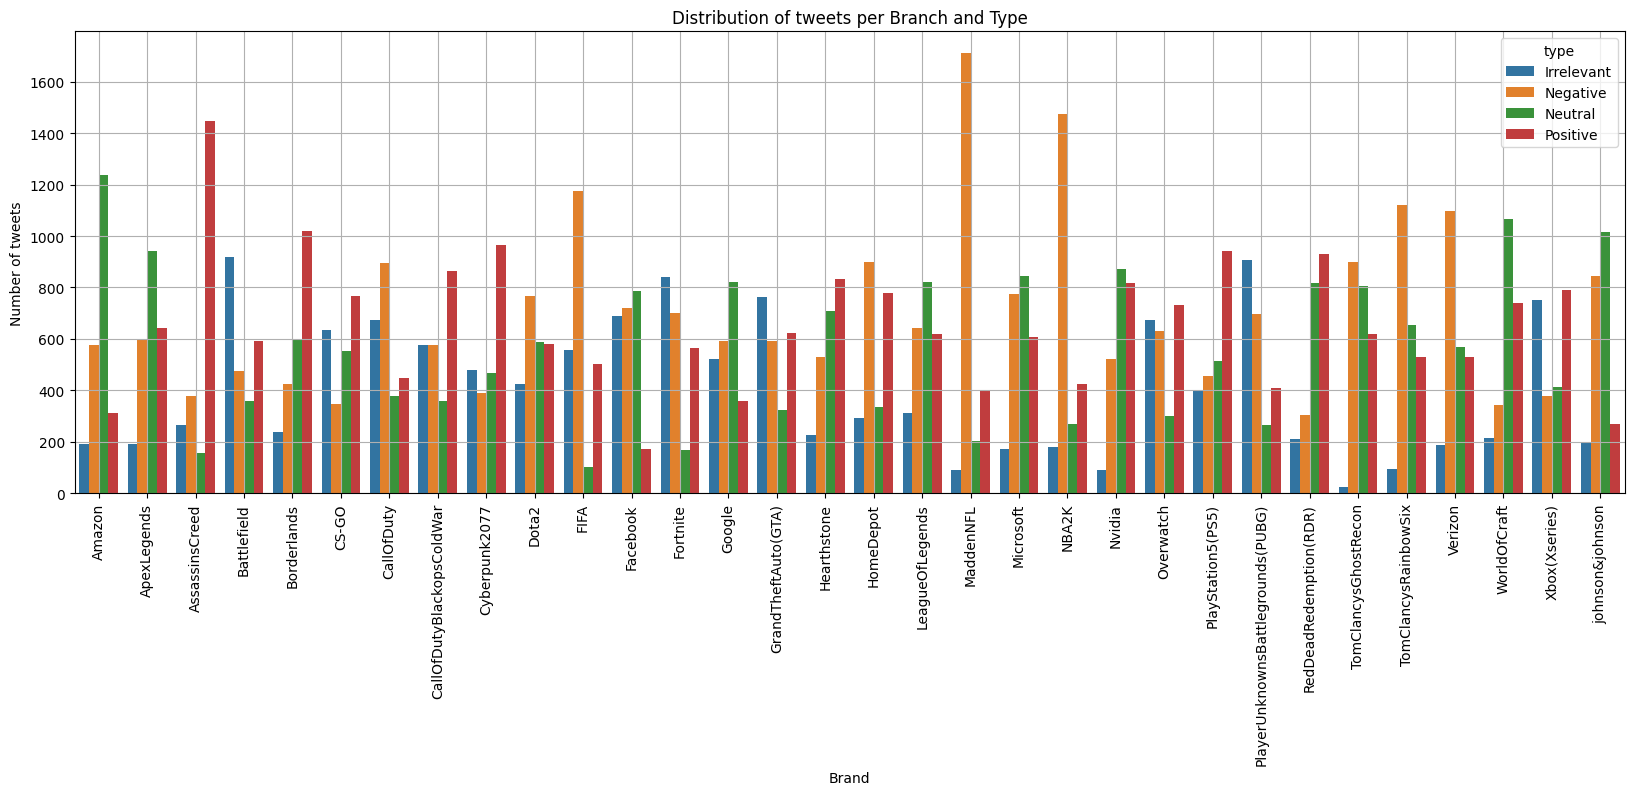

In [30]:
plt.figure(figsize=(20,6))
sns.barplot(data=count,x="information",y="id",hue="type")
plt.xticks(rotation=90)
plt.xlabel("Brand")
plt.ylabel("Number of tweets")
plt.grid()
plt.title("Distribution of tweets per Branch and Type");

In [32]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
# Tokenize text data in the 'lower' column of train_data
tokens_text = [word_tokenize(str(word)) for word in train_data['lower']]

# Flatten the list of tokens and count unique words
tokens_counter = [item for sublist in tokens_text for item in sublist]
unique_tokens_count = len(set(tokens_counter))

print("Number of tokens: ", unique_tokens_count)

Number of tokens:  30436


In [36]:
tokens_text[1]

['im',
 'getting',
 'on',
 'borderlands',
 'and',
 'i',
 'will',
 'kill',
 'you',
 'all']

In [37]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
stop_words[:5]

['i', 'me', 'my', 'myself', 'we']

In [38]:
bow_counts = CountVectorizer(
    tokenizer=word_tokenize,
    stop_words=stop_words, #English Stopwords
    ngram_range=(1, 1) #analysis of one word
)

In [39]:
reviews_train, reviews_test = train_test_split(train_data, test_size=0.2, random_state=0)

In [40]:
#Creation of encoding related to train dataset
X_train_bow = bow_counts.fit_transform(reviews_train.lower)
#Transformation of test dataset with train encoding
X_test_bow = bow_counts.transform(reviews_test.lower)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [41]:
y_train_bow = reviews_train['type']
y_test_bow = reviews_test['type']

In [42]:
model1 = LogisticRegression(C=1, solver="liblinear", max_iter=200)
model1.fit(X_train_bow, y_train_bow)
test_pred = model1.predict(X_test_bow)
print("Accuracy: ", accuracy_score(y_test_bow, test_pred) * 100)

Accuracy:  83.34337551047733


In [50]:
X_val_bow = bow_counts.transform(val_data.lower)
y_val_bow = val_data['type']

In [51]:
Val_res = model1.predict(X_val_bow)
print("Accuracy: ", accuracy_score(y_val_bow, Val_res) * 100)

Accuracy:  93.1931931931932
